# Matoto-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [verbreitung](#Verbreitung)
* [Appendix](#Appendix)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'MAT'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [2]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [3]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,33.0,30.555556
GE,75.0,69.444444


In [4]:
# nur einzeln aufgenommene GE
df_ge = df.loc[df['Anzahl'] == 1]

In [5]:
df_ge.pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = np.sum, margins = True)

Typ
BOT/MKA/MAT (?)     2.0
DON/MAT (?)         1.0
MAT                60.0
MAT (?)            12.0
All                75.0
Name: Anzahl, dtype: float64

In [6]:
df_pivot = df_ge.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum, fill_value = '')
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

Anzahl  Gewicht  \
ort_fluss     Ort                             bef_nr                      
Likwala-Esobe Likwala-Esobe km 401 (Fpl. 301) 87/401         1      573   
              Ngombe (Fpl. 283)               87/101         1       15   
              Yumba (Fpl. 289)                87/103         2      122   
Lua           Maluba (Fpl. 230)               85/1-3-1       8       69   
Sangha        Ikelemba (Fpl. 260)             87/101         4       47   
              Mandombe (Fpl. 259)             87/101        31      338   
              Matoto (Fpl. 264)               87/101         9      126   
              Molanda (Fpl. 258)              87/101         2       20   
                                              87/102         2       16   
                                              87/103         3       35   
              Motoli (Fpl. 261)               87/101         3       23   
                                              87/102         1        6   
              Pikunda (Fpl. 255)              87/1           2       10   
              Sangha Fkm 428 (Fpl. 263)       87/428         1        8   
Ubangi        Dongo (Fpl. 202)                85/101         1       14   
              Ebeka (Fpl. 197)                85/101         2       22   
              Libenge (Fpl. 208)              85/101         1       18   
              Mboko 1 (Fpl. 217)              85/101         1       75   

                                                          Prozent  
ort_fluss     Ort                             bef_nr               
Likwala-Esobe Likwala-Esobe km 401 (Fpl. 301) 87/401     1.333333  
              Ngombe (Fpl. 283)               87/101     1.333333  
              Yumba (Fpl. 289)                87/103     2.666667  
Lua           Maluba (Fpl. 230)               85/1-3-1  10.666667  
Sangha        Ikelemba (Fpl. 260)             87/101     5.333333  
              Mandombe (Fpl. 259)             87/101    41.333333  
              Matoto (Fpl. 264)               87/101    12.000000  
              Molanda (Fpl. 258)              87/101     2.666667  
                                              87/102     2.666667  
                                              87/103     4.000000  
              Motoli (Fpl. 261)               87/101     4.000000  
                                              87/102     1.333333  
              Pikunda (Fpl. 255)              87/1       2.666667  
              Sangha Fkm 428 (Fpl. 263)       87/428     1.333333  
Ubangi        Dongo (Fpl. 202)                85/101     1.333333  
              Ebeka (Fpl. 197)                85/101     2.666667  
              Libenge (Fpl. 208)              85/101     1.333333  
              Mboko 1 (Fpl. 217)              85/101     1.333333

In [7]:
sorted(df_pivot['Anzahl'])[-2] # neben den 31 GE aus die zweitgrößte Anzahl

9

In [8]:
# nur ausgezählte Stücke
df_a = df.loc[df['Anzahl'] != 1]

In [9]:
df_a.pivot_table(values = 'Anzahl', index = 'Typ', columns = 'Scherbe', aggfunc = np.sum, margins = True)

Scherbe,R,All
Typ,,
MAT,33.0,33.0
All,33.0,33.0


In [10]:
df_pivot = df_a.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum, fill_value = '')
df_pivot

Anzahl Gewicht
ort_fluss Ort                 bef_nr               
Sangha    Mandombe (Fpl. 259) 87/101     30     182
          Matoto (Fpl. 264)   87/101               
          Motoli (Fpl. 261)   87/101      3      21

In [11]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)

Anzahl Fundorte:

In [12]:
len(df_pivot.index)

18

Anzahl Stücke:

In [13]:
np.sum(df_pivot['Anzahl'])

108.0

Gewicht insgesamt in kg:

In [14]:
np.sum(df_pivot['Gewicht']) / 1000

1.74

### Scherbentypen

In [15]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,2.0,1.851852
R,100.0,92.592593
W,6.0,5.555556
B,0.0,0.000000


In [16]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Technologische Merkmale (*fabrics*)

In [17]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%MAT%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [18]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


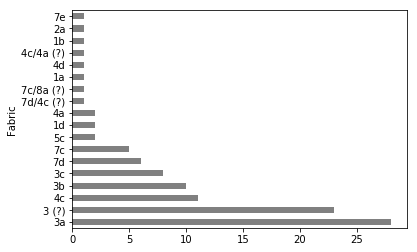

In [19]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [20]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
3a,28,26.666667
3 (?),23,21.904762
4c,11,10.476190
3b,10,9.523810
3c,8,7.619048


In [21]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,4,5.633803
wenig,4,5.633803
mittel,11,15.492958
viel,38,53.521127
sehr viel,14,19.718310


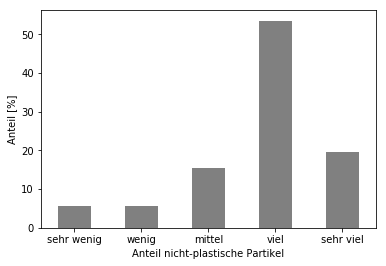

In [22]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [23]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,4,5.555556
F,3,4.166667
M,23,31.944444
C,33,45.833333
VC,9,12.500000


In [24]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [25]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,61,84.722222
S/Org,4,5.555556
S/Gl,2,2.777778
S/Laterit,2,2.777778
Gl/Laterit,1,1.388889
S/rote Partikel,1,1.388889
rote Partikel,1,1.388889


### Brennfarbe

In [26]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%MAT%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,25,24.752475
Sonstig,24,23.762376
Weiß,52,51.485149


In [27]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [28]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

        33
g       30
bg      16
s       10
         8
br       5
 bg      2
g bg     2
bg g     2
g        2
dtype: int64

### Oberfläche der Scherben

In [29]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%MAT%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
glatt,19,26.388889
glatt/leicht rau,2,2.777778
leicht rau,38,52.777778
rau,13,18.055556


### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


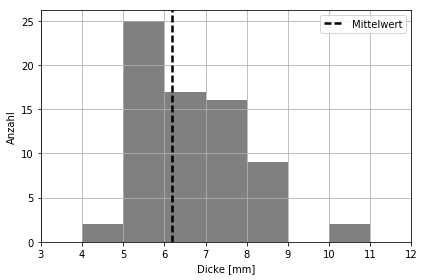

In [30]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%MAT%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

In [31]:
df['Wandung'].describe()

count    71.000000
mean      6.197183
std       1.326862
min       4.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      11.000000
Name: Wandung, dtype: float64

In [32]:
df['Wandung'].var()

1.7605633802816905

## Gefäßformen

In [94]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MAT%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='right')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,ort_kurz,Ort,objID,Typ,Form_Gef
0,21.0,2.0,MBK,85/101,NaN,93,MBK,Mboko 1 (Fpl. 217),2594,MAT,F1
1,59.0,27.0,MAT,87/101,NaN,4,MAT,Matoto (Fpl. 264),1461,MAT,C1 (?)
2,87.0,3.0,LKW 401,87/401,NaN,1,LKW 401,Likwala-Esobe km 401 (Fpl. 301),1654,MAT,F1
3,NaN,NaN,MDB,87/101,NaN,9,MDB,Mandombe (Fpl. 259),1255,MAT,D1 (?)
4,NaN,NaN,MLB,85/1-3-1,NaN,-2:48,MLB,Maluba (Fpl. 230),1975,MAT,F1 (?)
5,NaN,NaN,MLB,85/1-3-1,NaN,-2:60,MLB,Maluba (Fpl. 230),2437,MAT,G1 (?)
6,NaN,NaN,MLB,85/1-3-1,NaN,-3-1-2:4,MLB,Maluba (Fpl. 230),2477,MAT,E1 (?)
7,NaN,NaN,YUM,87/103,NaN,30,YUM,Yumba (Fpl. 289),3715,BOT/MKA/MAT (?),F3/F1 (?)
8,NaN,NaN,YUM,87/103,NaN,26,YUM,Yumba (Fpl. 289),3716,BOT/MKA/MAT (?),F3/F1 (?)
9,NaN,NaN,MDB,87/101,NaN,76,MDB,Mandombe (Fpl. 259),4235,MAT,C2 (?)


In [86]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [87]:
df_pivot['objID'].sum()

10

In [88]:
df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,8,80.0
sicher,2,20.0


In [89]:
# alles fragliche einfach abschneiden und nur 1. Variante behalten:
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df['Form_Gef'] = df['Form_Gef'].apply(lambda x: x.split('/')[0])

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


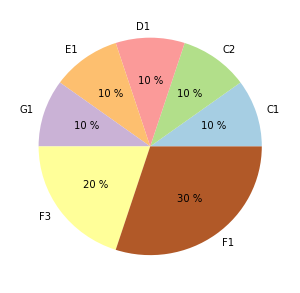

In [90]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
# plt.savefig('output/3-1-1-7_Motenge-Boma_GefForm1.pdf')

### Proportionen

In [38]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MAT%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

In [39]:
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['maxD']

In [40]:
fig = plt.figure(1)
fig.set_size_inches(12,15)

plt.subplot(421)

df['muendungsD'].hist(histtype='stepfilled')
plt.xlabel("Mündungsdurchmesser [cm]")

plt.subplot(422)

df['muendungsH'].hist(histtype='stepfilled', orientation='horizontal')
plt.ylabel("Mündungshöhe [cm]")

plt.subplot(423)

a = df.loc[df['Form_Gef'].str.contains("G1")]   # Schalen
b = df.loc[df['Form_Gef'].str.contains("G3")]   # Schalen
c = df.loc[~df['Form_Gef'].str.contains("G10")]   # geschlossene Gef

plt.scatter(c['maxD'], c['muendungsH'], alpha=0.7, c = 'g', s = 50, label = 'Sonstige')
plt.scatter(a['maxD'], a['muendungsH'], alpha=0.7, c = 'r', s = 50, label = 'G1')#
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.7, c = 'b', s = 50, label = 'G3')
#plt.legend(loc = 2)
#plt.xlabel("Maximaldurchmesser [cm]")
#plt.ylabel("Mündungshöhe [cm]")

plt.subplot(424)

df['maxD-muendH'].hist(histtype='stepfilled', fc='#CCCCCC')
plt.xlabel("Maximaler Durchmesser / Mündungshöhe")

plt.subplot(425)

df['minD'].hist(histtype='stepfilled', fc='#86B404')
plt.xlabel("Minimaler Durchmesser [cm]")

plt.subplot(426)

df['muend-min'].hist(histtype='stepfilled', fc='#E1F5A9')
plt.axvline(df['muend-min'].mean(), color='r', linestyle = '--')
plt.legend(["Mittelwert"])
plt.xlabel("MündungsD / MinD")

plt.subplot(427)

df['maxD'].hist(histtype='stepfilled', fc='#2E64FE')
plt.xlabel("Maximaler Durchmesser [cm]")

plt.subplot(428)

df['max-min'].hist(histtype='stepfilled', fc='#81BEF7')
plt.axvline(df['max-min'].mean(), color='r', linestyle = '--')
plt.legend(["Mittelwert"])
plt.xlabel("MaxD / MinD")

# plt.savefig('output/3-1-2-2_NGO_Keramik-Abmessungen.pdf')
plt.show()

In [41]:
df.pivot_table(values = ['maxD', 'muendungsH'], index = ['Form_Gef'], aggfunc = [len, min, max])

len              min              max           
          maxD muendungsH  maxD muendungsH  maxD muendungsH
Form_Gef                                                   
C1 (?)     1.0        1.0   NaN        NaN   NaN        NaN
C2 (?)     1.0        1.0   NaN        NaN   NaN        NaN
D1 (?)     1.0        1.0   NaN        NaN   NaN        NaN
E1 (?)     1.0        1.0   NaN        NaN   NaN        NaN
F1         2.0        2.0  14.0       11.5  22.0       17.0
F1 (?)     1.0        1.0   NaN        NaN   NaN        NaN
F3/F1 (?)  2.0        2.0  20.0        NaN  20.0        NaN
G1 (?)     1.0        1.0   NaN        NaN   NaN        NaN

## Bauchform

In [42]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MAT%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [43]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
C1/leicht/D1,2,40.0
A1/D1,1,20.0
C1 (?),1,20.0
D1,1,20.0


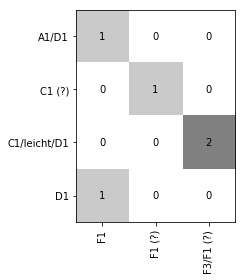

In [44]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

## Mündungs- und Randformen

In [45]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MAT%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [46]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M2,20,34.482759
M4,19,32.758621
M1,5,8.620690
M5,4,6.896552
M3/M1,3,5.172414
M4 (?),2,3.448276
M5/M1,2,3.448276
M3,1,1.724138
M4/M5,1,1.724138


In [47]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1.1,32,44.444444
A2,28,38.888889
B1.1 (?),5,6.944444
A2 (?),2,2.777778
A2/A1,1,1.388889


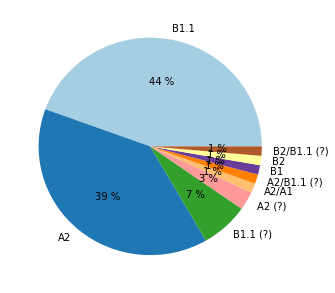

In [48]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

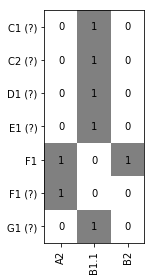

In [49]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', columns = 'Form_Rand', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

In [50]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', fill_value = 0, aggfunc = len)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

In [51]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

In [52]:
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,objID,Prozent
Form_Hals,,
A1/B1,15,23.809524
A1,9,14.285714
B1,8,12.698413
B1/A1,4,6.349206
A1/A3,3,4.761905


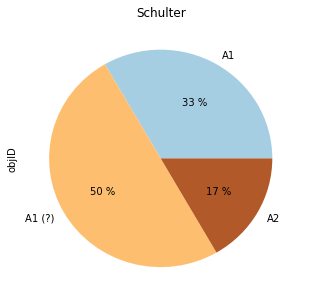

In [53]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

In [54]:
df_pivot

Form_Schulter
A1        2
A1 (?)    3
A2        1
Name: objID, dtype: int64

## Bodenformen

In [55]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MAT%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden
0,YUM,Yumba,3715,BOT/MKA/MAT (?),F3/F1 (?),B1
1,YUM,Yumba,3716,BOT/MKA/MAT (?),F3/F1 (?),B1


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


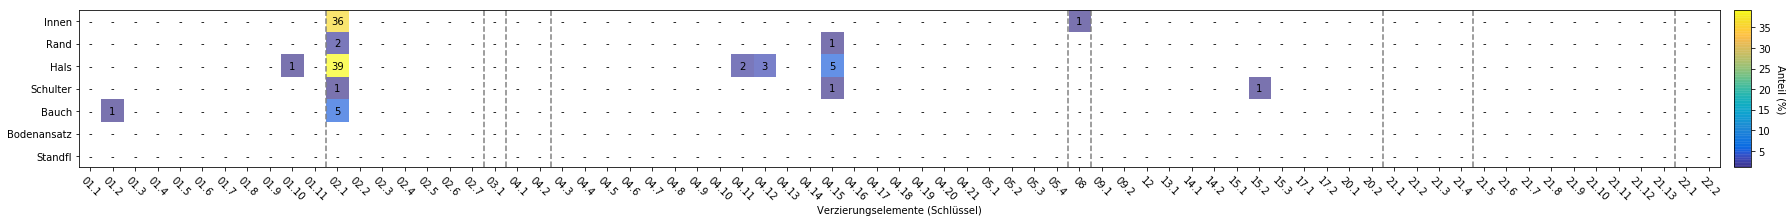

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-3_Matoto_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [2]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%MAT%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [3]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

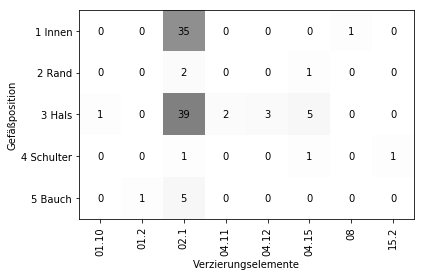

In [4]:
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

In [5]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


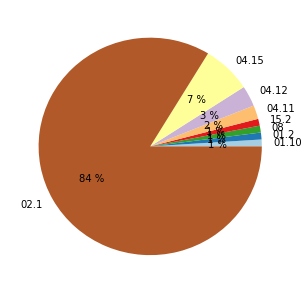

In [6]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')
#plt.title('Mokelo-Gruppe\nGefäßformen')
#plt.savefig('output/3-1-1-3_Mokelo-Gr_GefForm2.pdf')

In [7]:
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,objID,Prozent
verzName,,
02.1,82,83.673469
04.15,7,7.142857
04.12,3,3.061224
04.11,2,2.040816
01.10,1,1.020408


In [8]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
pos,,
1 Innen,36,36.734694
2 Rand,3,3.061224
3 Hals,50,51.020408
4 Schulter,3,3.061224
5 Bauch,6,6.122449


In [9]:
df_pivot = df_pivot.sort_index(ascending=False)

df_pivot.plot(y = 'Prozent', kind = 'barh', legend = None, color = 'grey')
plt.xlabel('Anteil [%]')
plt.show()

In [10]:
df_pivot.at['1 Innen','Prozent'] + df_pivot.at['3 Hals','Prozent']

87.755102040816325

## Verbreitung

In [ ]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

In [ ]:
df.to_csv("../data/processed/3-1-2-3_MAT_Verbreitung.csv", index = False)

In [ ]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Ort.ort_fluss,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) == 'MAT')
           AND ((t_Obj.Art) == 'K')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Ort.ort_fluss) == 'Sangha'))""".replace('\n',' ')

df1 = pd.read_sql(sql, con)

sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Ort.ort_fluss,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) == 'MAT')
           AND ((t_Obj.Art) == 'K')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Ort.ort_fluss) != 'Sangha'))""".replace('\n',' ')

df2 = pd.read_sql(sql, con)


a = pd.Series({'Sangha':np.sum(df1['Anzahl']),
               'Rest':np.sum(df2['Anzahl'])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

## Appendix

Funde der Matoto-Gruppe aus MLB 85/1-3-1:

In [76]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Obj.Individuum,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ,
           t_Obj.Tiefe
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MAT%')
           AND ((t_Ort.ort_name) = 'Maluba'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='right')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,ort_kurz,Ort,bef_nr,Individuum,ort_fluss,GE,Scherbe,Gewicht,Anzahl,Typ,Tiefe
0,NaN,NaN,MLB,85/1-3-1,NaN,-2:48,MLB,Maluba (Fpl. 230),85/1-3-1,-2:48,Lua,,R,18,1,MAT,"0,5"
1,NaN,NaN,MLB,85/1-3-1,NaN,-2:60,MLB,Maluba (Fpl. 230),85/1-3-1,-2:60,Lua,,R,13,1,MAT,"0,5"
2,NaN,NaN,MLB,85/1-3-1,NaN,-3-1-2:4,MLB,Maluba (Fpl. 230),85/1-3-1,-3-1-2:4,Lua,,R,8,1,MAT,"1,05"
3,NaN,NaN,MLB,85/1-3-1,NaN,-1:91,MLB,Maluba (Fpl. 230),85/1-3-1,-1:91,Lua,,R,8,1,MAT (?),"0,5"
4,NaN,NaN,MLB,85/1-3-1,NaN,-3-1-1:39,MLB,Maluba (Fpl. 230),85/1-3-1,-3-1-1:39,Lua,,W,6,1,MAT (?),"0,9"
5,NaN,NaN,MLB,85/1-3-1,NaN,-1:83,MLB,Maluba (Fpl. 230),85/1-3-1,-1:83,Lua,,R,8,1,MAT (?),"0,5"
6,NaN,NaN,MLB,85/1-3-1,NaN,1,MLB,Maluba (Fpl. 230),85/1-3-1,1,Lua,,R,4,1,MAT,"0,5"
7,NaN,NaN,MLB,85/1-3-1,NaN,-1:92,MLB,Maluba (Fpl. 230),85/1-3-1,-1:92,Lua,,R,4,1,MAT (?),"0,5"


In [68]:
df.pivot_table(values = 'Anzahl', index = ['bef_nr', 'Tiefe'], aggfunc = np.sum, margins = True)

bef_nr    Tiefe
85/1-3-1  0,5      6.0
          0,9      1.0
          1,05     1.0
All                8.0
Name: Anzahl, dtype: float64

In [69]:
df.pivot_table(values = 'Anzahl', index = 'Scherbe', columns = 'Typ', aggfunc = np.sum, margins = True)

Typ,MAT,MAT (?),All
Scherbe,,,
R,4.0,3.0,7.0
W,NaN,1.0,1.0
All,4.0,4.0,8.0


**PIK 87/1**

In [74]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Obj.Individuum,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ,
           t_Obj.Tiefe
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MAT%')
           AND ((t_Ort.ort_name) = 'Pikunda'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='right')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,ort_kurz,Ort,bef_nr,Individuum,ort_fluss,GE,Scherbe,Gewicht,Anzahl,Typ,Tiefe
0,48.0,11.0,PIK,87/1,NaN,-3:110,PIK,Pikunda (Fpl. 255),87/1,-3:110,Sangha,,R,6,1,MAT (?),72
1,NaN,NaN,PIK,87/1,NaN,-2:207,PIK,Pikunda (Fpl. 255),87/1,-2:207,Sangha,,R,4,1,MAT (?),52


## Tafeln

In [70]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,21,2,MBK,85/101,NaN,93,MAT,F1,B2,None
1,48,11,PIK,87/1,NaN,-3:110,MAT (?),None,B2/B1.1 (?),None
2,57,14,MDB,87/101,NaN,171,MAT,None,A2 (?),None
3,59,1,IKM,87/101,NaN,4,MAT,None,A2,None
4,59,2,IKM,87/101,NaN,2,MAT,None,A2,None
5,59,26,MAT,87/101,NaN,10,MAT,None,B1.1,None
6,59,27,MAT,87/101,NaN,4,MAT,C1 (?),B1.1,None
7,59,28,MAT,87/101,NaN,6,MAT,None,B1.1,None
8,59,29,MAT,87/101,NaN,7,MAT,None,B1.1,None
9,59,30,MAT,87/101,NaN,2,MAT,None,B1.1,None
